# Lecture 4

rejection sampling
- PDF exists that I can't sample from
- take a uniform distribution over the pdf
- make a bounding box over uniform distribution and sample from that distribution
- change probabilities of accepting each sample from this uniform distribution according to the PDF
- now pdf is reconstructed
- **sampling a bunch of unecessary values**
    - so, better to model your pdf with some other distribution you can sample from (but one thats closer to it), so that you have fewer unecessary values

In [1]:
%pylab inline
from scipy.stats import norm as gaussian

Populating the interactive namespace from numpy and matplotlib


In [26]:
mu, sigma, N = 0, 1, 10
x = gaussian.rvs(mu, sigma, N)

avg = np.mean(x)

# variance estimates
s2 = np.sum((x-avg)**2) / (N-1)
s2n  = np.sum( (x-avg)**2 ) / N     # biased 
s2k  = np.sum( (x- mu)**2 ) / N     # known mean

sqrt(s2), sqrt(s2n), sqrt(s2k)

(1.1090855700779014, 1.0521709564417376, 1.223917406191971)

(5, 10000) (10000,)
0.944494312900873 0.8447813952033235 0.9596212748174561


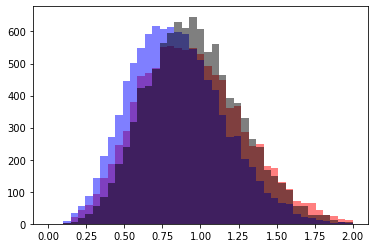

In [79]:
mu, sigma, N, M = 0, 1, 5, 10000
X = gaussian.rvs(loc=mu, scale=sigma, size=(N,M))
avg = np.mean(X, axis=0)
print(X.shape, avg.shape)

# variance estimates
s2   = np.sum( (X-avg)**2, axis=0) /(N-1) # correct
s2n  = np.sum( (X-avg)**2, axis=0) / N    # biased
s2k  = np.sum( (X- mu)**2, axis=0) / N    # known mean

s, sn, sk = np.sqrt(s2), np.sqrt(s2n), np.sqrt(s2k)
print(mean(s), mean(sn), mean(sk))

hist(s, 41, range=[0,2], color='r', alpha=0.5)
hist(sn, 41, range=[0,2], color='b', alpha=0.5);
hist(sk, 41, range=[0,2], color='k', alpha=0.5);


In [71]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.390783,-0.210560,-1.807673,0.401675,-0.077134,-0.345899,0.146798,0.476016,-2.093404,-0.200939,...,-0.192376,1.757556,-0.204660,0.792893,0.248281,-1.006756,1.416199,0.000488,0.324248,1.762067
1,0.294475,-0.696747,0.737281,0.662788,-0.913559,1.636786,-0.387053,0.782641,-1.135480,-0.125827,...,1.347621,-0.367522,-0.608524,-1.658484,-0.790154,0.812665,0.613166,0.987125,0.876881,-0.547057
2,-0.109082,-0.234129,-0.247116,-0.193386,0.047101,1.233180,-1.076738,-0.196344,-0.839738,1.256382,...,1.412312,0.148543,0.575096,1.612048,-1.331997,-0.769922,1.779121,-0.374335,0.650130,1.665420
3,1.131682,-0.431762,0.897853,0.428756,0.141462,-0.614804,0.108003,0.038817,-0.168614,0.166181,...,0.057806,-1.865935,-0.045861,-0.001805,0.632434,-0.913189,-1.810592,-1.247178,0.494175,0.759797
4,0.483631,0.292195,-0.699785,0.674367,-0.859272,-1.273775,-0.245181,0.048892,0.364584,0.436274,...,-0.531473,0.222659,-0.215077,0.602773,-1.313194,0.084507,0.390671,-0.853200,0.389682,1.087814
